In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv' )
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df['class'] = df['class'].str.replace('Iris-setosa','1')
df['class'] = df['class'].str.replace('Iris-virginica','0')

df = df.astype('float64')

In [4]:
import numpy as np

alpha = 0.1
teta = np.array([0.6,0.55,0.4,0.3])
bias = 0.4
epoch = 60
e = 0
adteta = np.empty(4)
sumerr = np.zeros(60)


In [5]:
#defining H, Sigmoid, and error function 
def H(x,teta,bias,i):
    return np.dot(x.iloc[i,:4],np.transpose(teta))+bias

import math as mt

#S = sigmoid
def S(H):
    return 1/(1+ mt.exp(-H))

def error(S,i):
    return (S-(df.iloc[i,4]))**2

In [6]:
#defining the prediction classes
def pre(S):
    if S > 0.5:
        predict = 1
        return pre
    else:
        predict = 0
        return pre

In [7]:
#defining delta teta, delta bias, new teta, and new bias
def dteta(S,fact,ax,i):
    return 2*(S-fact)*(1-S)*S*ax[i]

def dbias(S,fact):
    return 2*(S-fact)*(1-S)*S

def nteta(teta,alpha,dteta,i):
    return teta[i]-(alpha*dteta[i])

def nbias(bias,alpha,dbias,i):
    return bias[i]-(alpha*dbias[i])

def chgbias(bias,alpha,dbiasfunc):
    bias = nbias(bias,alpha,dbiasfunc)

In [8]:
#looping for 60 iteration
for n in range(epoch):
    e=0
    
    #print all values of each x1,x2,x3,x4 and the real classes(fact)
    for i in range(100):
        ax = np.array(df.iloc[i,:4])
        print('X1, X2, X3, X4=',ax)
        
        fact = np.array(df.iloc[i,4])
        print('Fact =',fact)
        

    #print H function
        Hfunc = H(df,teta,bias,i)
        print('H =',Hfunc)
    #Print Sigmoid function    
        Sfunc = S(Hfunc)
        print('Sigmoid =',Sfunc)
    #Print Error function    
        errfunc = error(Sfunc,i)
        print('Error =',errfunc)
        e += errfunc
    #Print Prediction function    
        prefunc = pre(Sfunc)
        print('Prediction =',prefunc)
        
        for j in range(len(ax)):
            adteta[j] = dteta(Sfunc,fact,ax,j)
        dbiasfunc = dbias(Sfunc,fact)
        
        for j in range(len(teta)):
            teta[j]= nteta(teta,alpha,adteta,j)
    
    sumerr[n]=e
    print('Sum of the Error:',sumerr[n])    
        
    

X1, X2, X3, X4= [5.1 3.5 1.4 0.2]
Fact = 1.0
H = 6.005
Sigmoid = 0.9975396787614879
Error = 6.05318059667392e-06
Prediction = <function pre at 0x7f048fca3950>
X1, X2, X3, X4= [4.9 3.  1.4 0.2]
Fact = 1.0
H = 5.610045275082134
Sigmoid = 0.9963524497236932
Error = 1.3304623018185886e-05
Prediction = <function pre at 0x7f048fca3950>
X1, X2, X3, X4= [4.7 3.2 1.3 0.2]
Fact = 1.0
H = 5.560136160094251
Sigmoid = 0.996166499892397
Error = 1.4695723074991996e-05
Prediction = <function pre at 0x7f048fca3950>
X1, X2, X3, X4= [4.6 3.1 1.5 0.2]
Fact = 1.0
H = 5.52523227926065
Sigmoid = 0.996030873776608
Error = 1.575396297721773e-05
Prediction = <function pre at 0x7f048fca3950>
X1, X2, X3, X4= [5.  3.6 1.4 0.2]
Fact = 1.0
H = 6.00036921745359
Sigmoid = 0.9975282873543777
Error = 6.109363402529153e-06
Prediction = <function pre at 0x7f048fca3950>
X1, X2, X3, X4= [5.4 3.9 1.7 0.4]
Fact = 1.0
H = 6.58545513174441
Sigmoid = 0.9986216035924691
Error = 1.899976656294096e-06
Prediction = <function pre at 

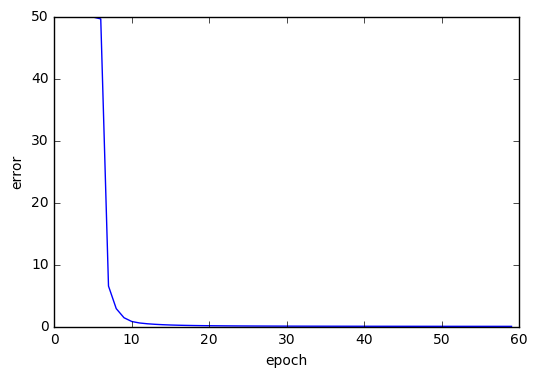

In [9]:
plt.plot(sumerr)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()